# ECDSA - ein visueller Überblick

In der Algebra ist ein Körper eine Menge mit den Grundoperationen Addition und Multiplikation und erfüllt spezielle Eigenschaften.

Für jede Primzahl p liefern die Restklassen-Arithmetik (Restklassen modulo p) einen endlichen Körper - den Galoiskörper GF(p) zu Ehren des französischen Mathematikers Evariste Galois.

Eine Elliptische Kurve ist die Menge aller Lösungen (Punkte x,y) einer spezielle Gleichung über einem für eben diese Punkte - d.h. alle Punkte erfüllen die "Gleichung".

Für die reellen Zahlen sind Linien und für endliche Körper Punktmengen auf einem Gitter geeignete Visualisierungen der algebraichen/geometrischen Verhältnisse..

Auf einer Elliptischen Kurve kann dann eine Abelsche Gruppe definiert werden; in dieser Abelschen Gruppe ist der diskrete Logarithmus schwer zu berechnen (ECDLP = Elliptic Curve Discrete Logarithm Problem). Vom Endlichen Körper zur  zur Abelschen Gruppe – das ist die Grundlage für Digitale Signaturen mit ECDSA für Bitcoin.

Ausgangspunkt ist die Kurvengleichung für Bitcoin auf GF(43). Damit entsteht die folgende Abelsche Gruppe.

## Die Abelsche Gruppe

In [38]:
q = 43

In [39]:
a = 0
b = 7

ec = EllipticCurve(GF(q), [a, b])

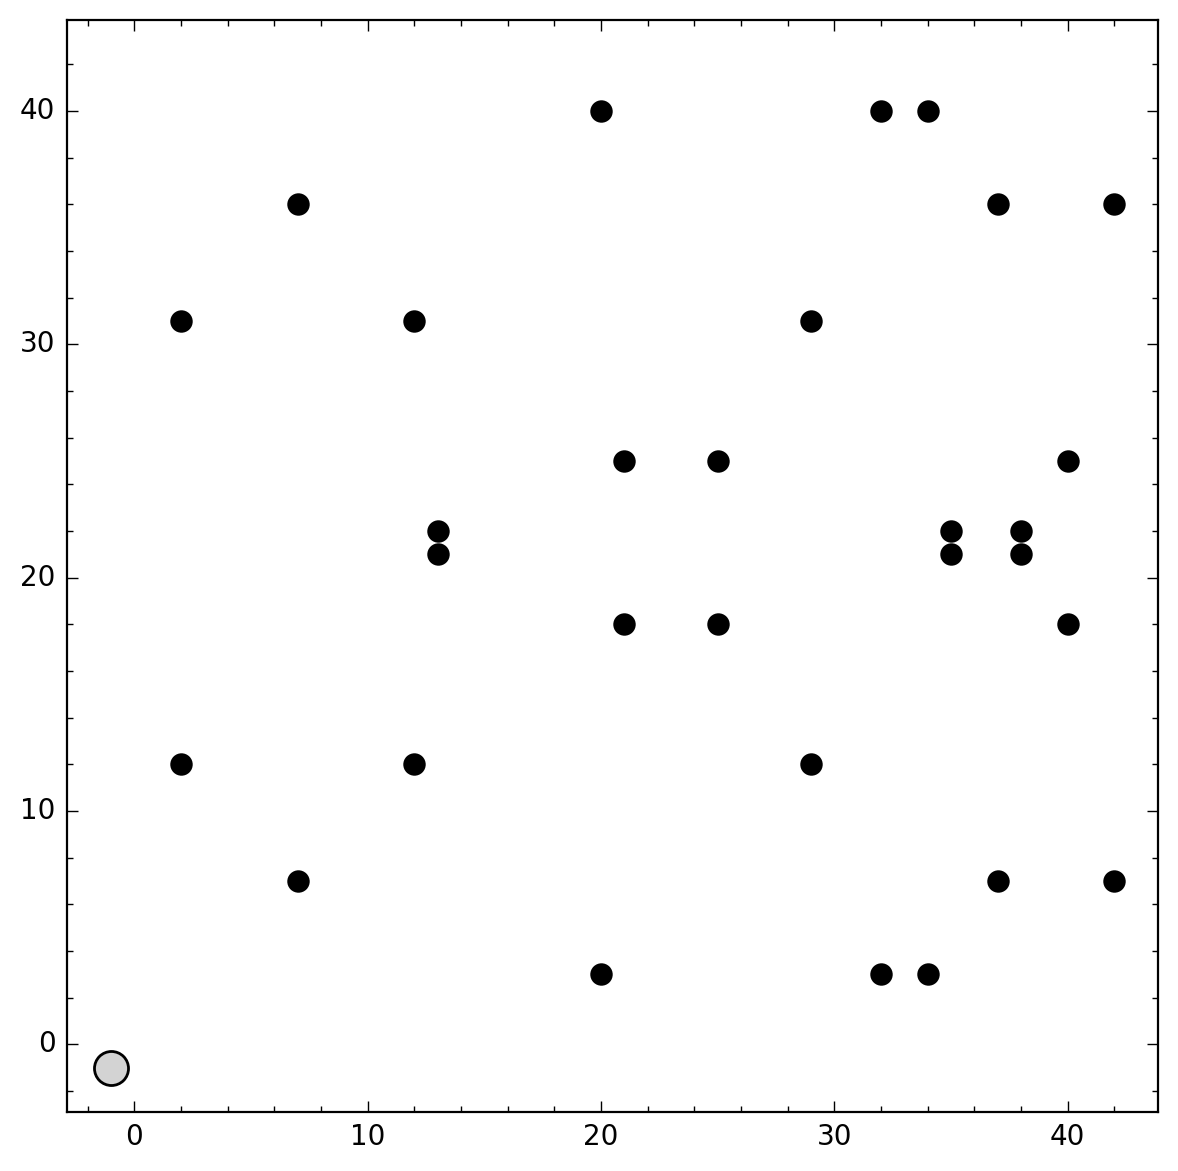

In [56]:
ecpnts = [(p[0],p[1]) for p in ec.points() if p[2] == 1]

ZERO = (-1,-1)

g1 = Graphics()
g1 += scatter_plot(ecpnts, markersize=50, edgecolor="black", facecolor="black")
g1 += scatter_plot([ZERO], markersize=150, facecolor="lightgrey")
show(g1, xmin=-2, xmax=q, ymin=-2, ymax=q, aspect_ratio=1, axes=False, frame=True, dpi=200)

## Generator, Order, Cofactor

Der Generator (8,8) hat die Order 31 und spannt damit die Abelsche Gruppe vollständig auf; und hat der Generator damit den Kofaktor 1. Solche Kurven und Generatoren mit Kofaktor 1 mögen Kryptographen - die haben die gute Eigenschaften. 

In [41]:
G = ec.points()[3]

In [42]:
n = G.order()
h = ec.cardinality()/n

In [43]:
n

31

In [44]:
h

1

In einer Abelschen Gruppe können Punkte addiert werden und es entstehen immer wieder Punkte darin. Insbesondere kann der Generator immer wieder zu sich selbst addiert werden. Irgendwann gelangt man wieder zum Anfang. Sind in der Zwischenzeit alle Punkte der Abelschen Gruppe erreicht worden, dann legt sich der grüne Linienzug fortgesetzter Addition des Generators über alle Punkte und der Mathematiker sagt, dass ein  Kofaktor von Eins vorliege.

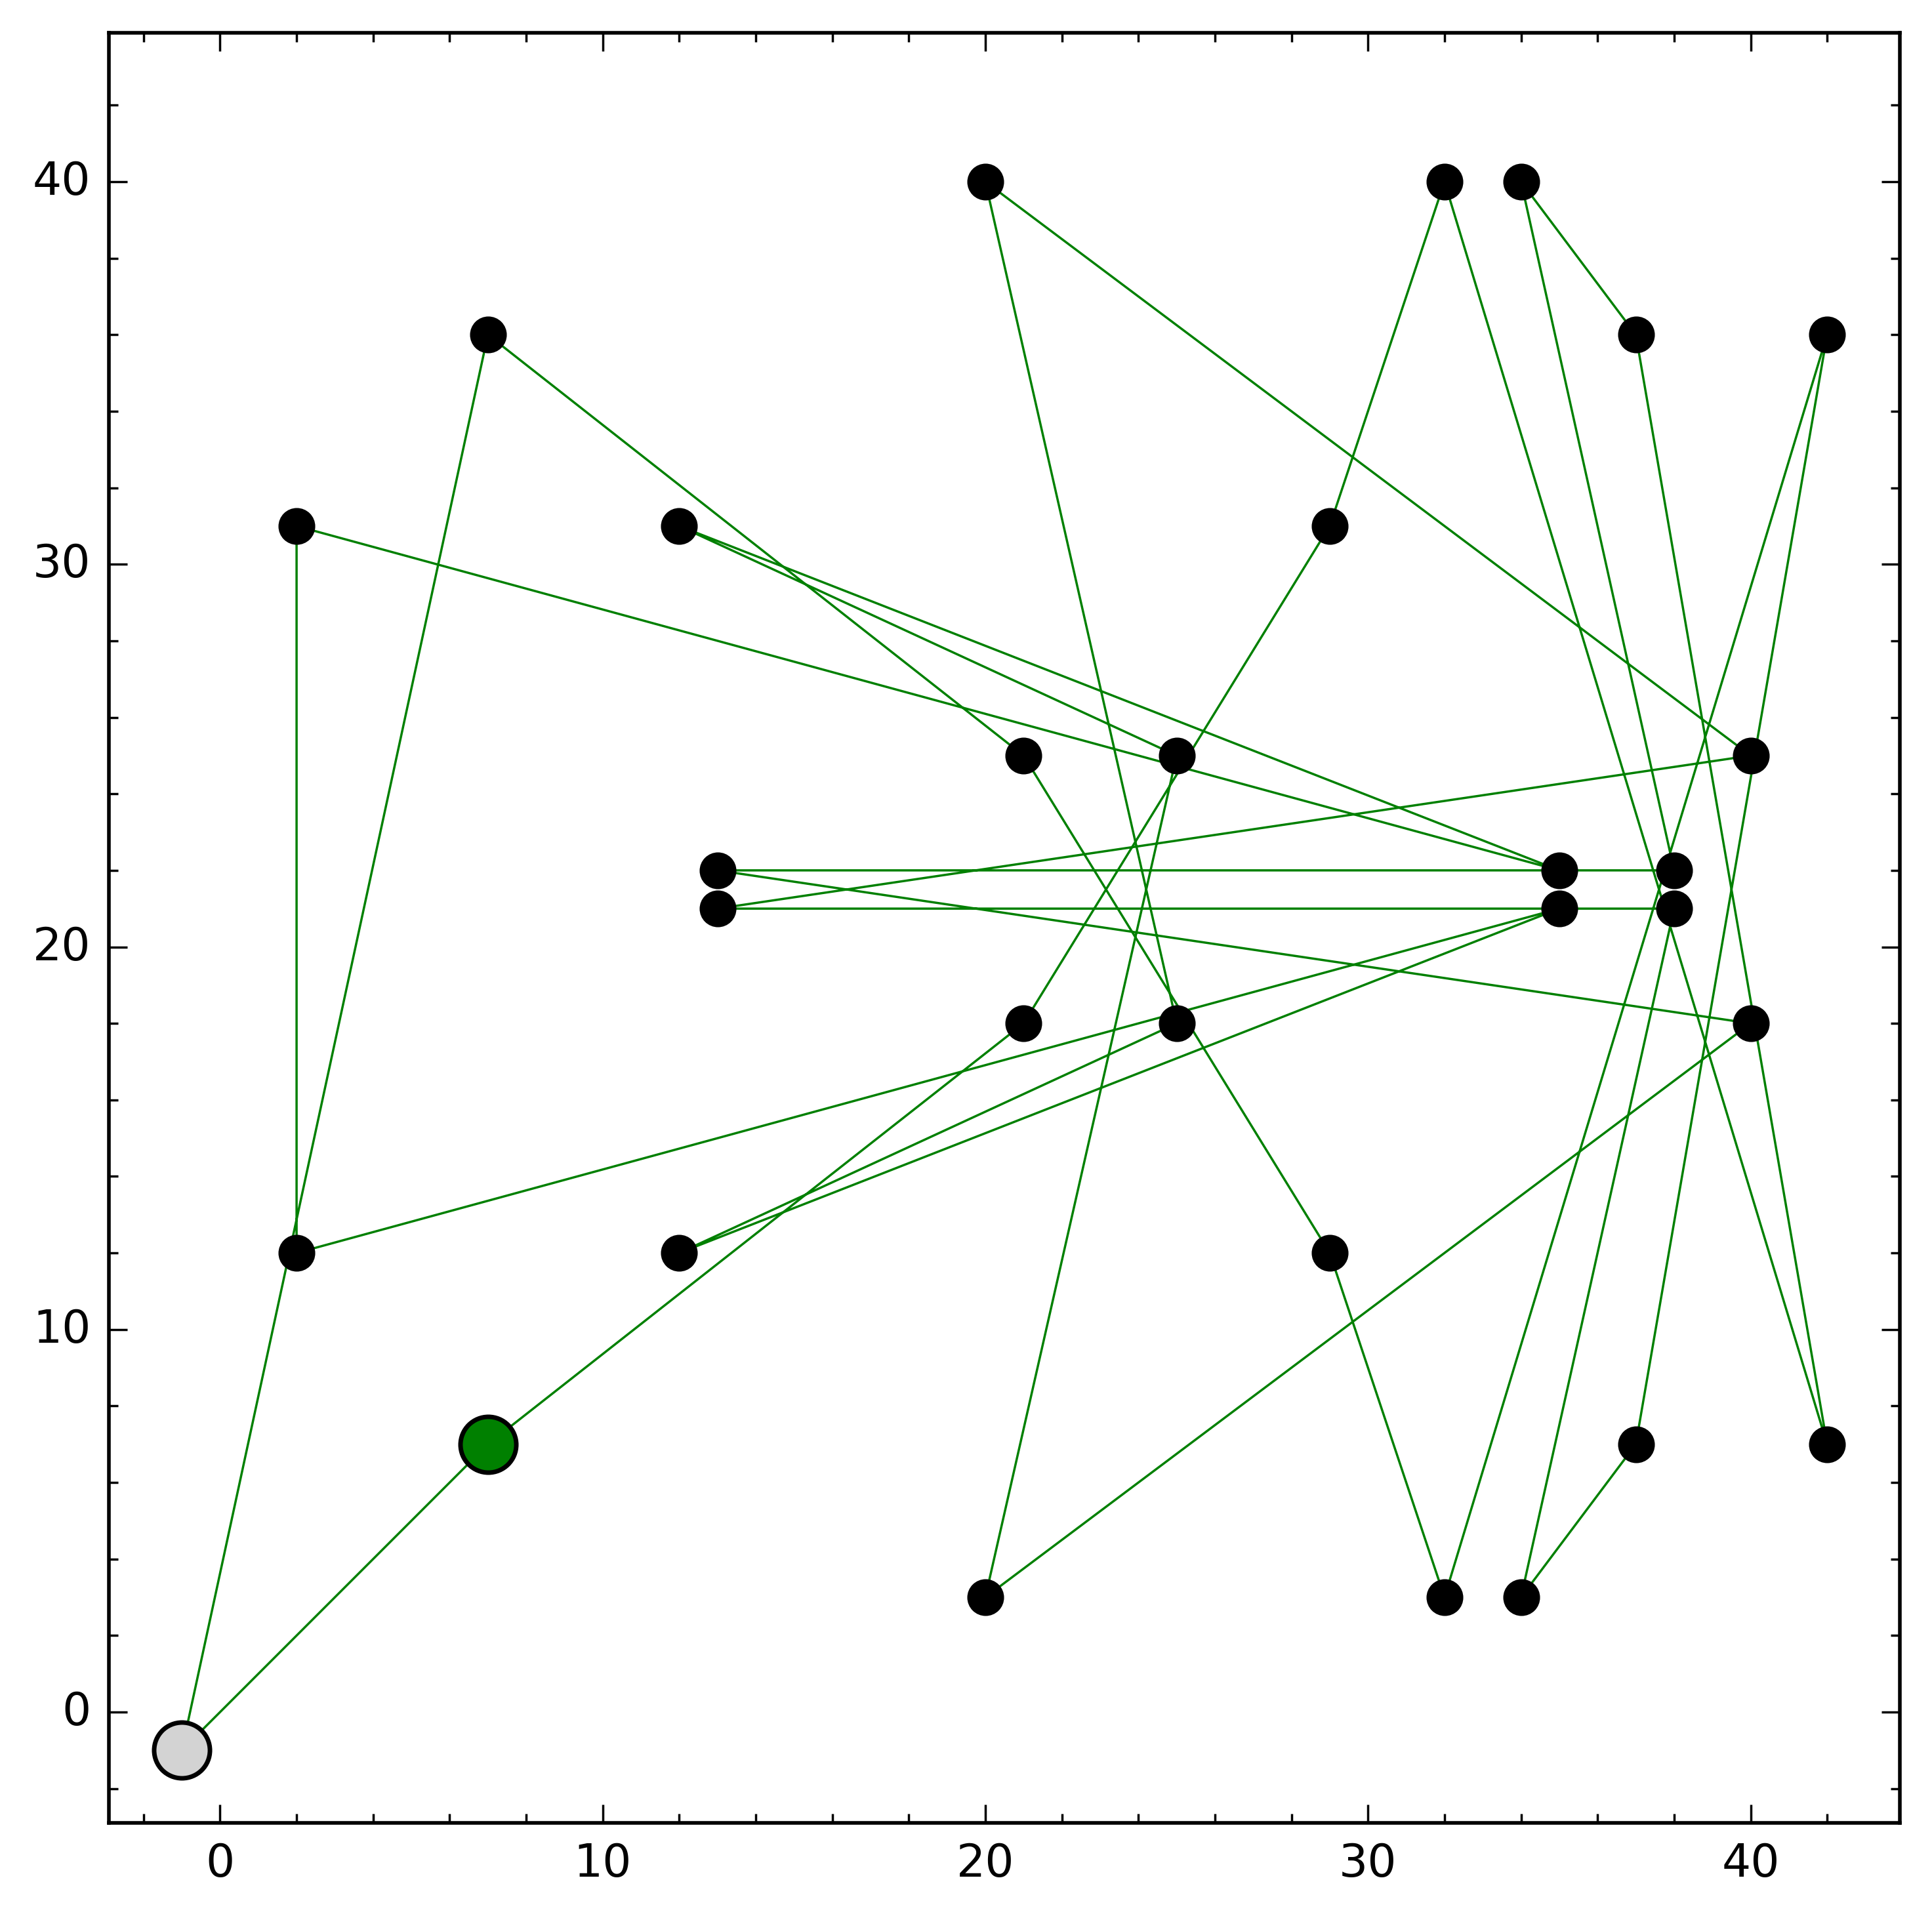

In [45]:
genpnts    = [((k*G)[0],(k*G)[1]) for k in range(0,n+1)]
genpnts[0] = ZERO
genpnts[n] = ZERO

g2 = Graphics()
g2 += scatter_plot(ecpnts,         markersize=50,  edgecolor="black", facecolor="black")
g2 += scatter_plot([ZERO],         markersize=150, facecolor="lightgrey")
g2 += scatter_plot([(G[0],G[1])],  markersize=150, facecolor="green")
g2 += line(genpnts,                thickness=0.5,  rgbcolor="green")

show(g2, xmin=-2, xmax=q, ymin=-2, ymax=q, aspect_ratio=1, axes=False, frame=True, dpi=200)

Der Generator ist ein wichtiger Bezugspunkt für eine Elliptische Kurve.

## Private/Public/Session Key

ECC definiert Private Key und Public Key über der mathematischen Konstruktion der Abelschen Gruppe.

Der Private Key ist eine zufällige und geheime Zahl zwischen1 und der Ordnung der Abelschen Gruppe. Der zugehörige Public Key entsteht durch fortgesetzte Addition des Generators - der private Key gibt die die Zahl der Summanden vor.

Für eine Digitale Signatur mit Elliptischen Kurven (ECDSA - Elliptic Curve Digital Signature Algorithm) wird mit einer zweiten Zufallszahl ein Session Key gebildet und nur für diese eine Signature Session verwendet.

Im Beispiel wird mit dem Private Key 9 der Public Key (13, 22) gebildet und der Session Key ist (12, 31).

In [46]:
privatekey = 9
P          = genpnts[privatekey]

sessionkey = 13
S          = genpnts[sessionkey]

In [47]:
P

(13, 22)

In [48]:
S

(12, 31)

In der Visualisierung ist der Generator der grüne Punkt und der Public Key ist rot und der Session Key ist blau.

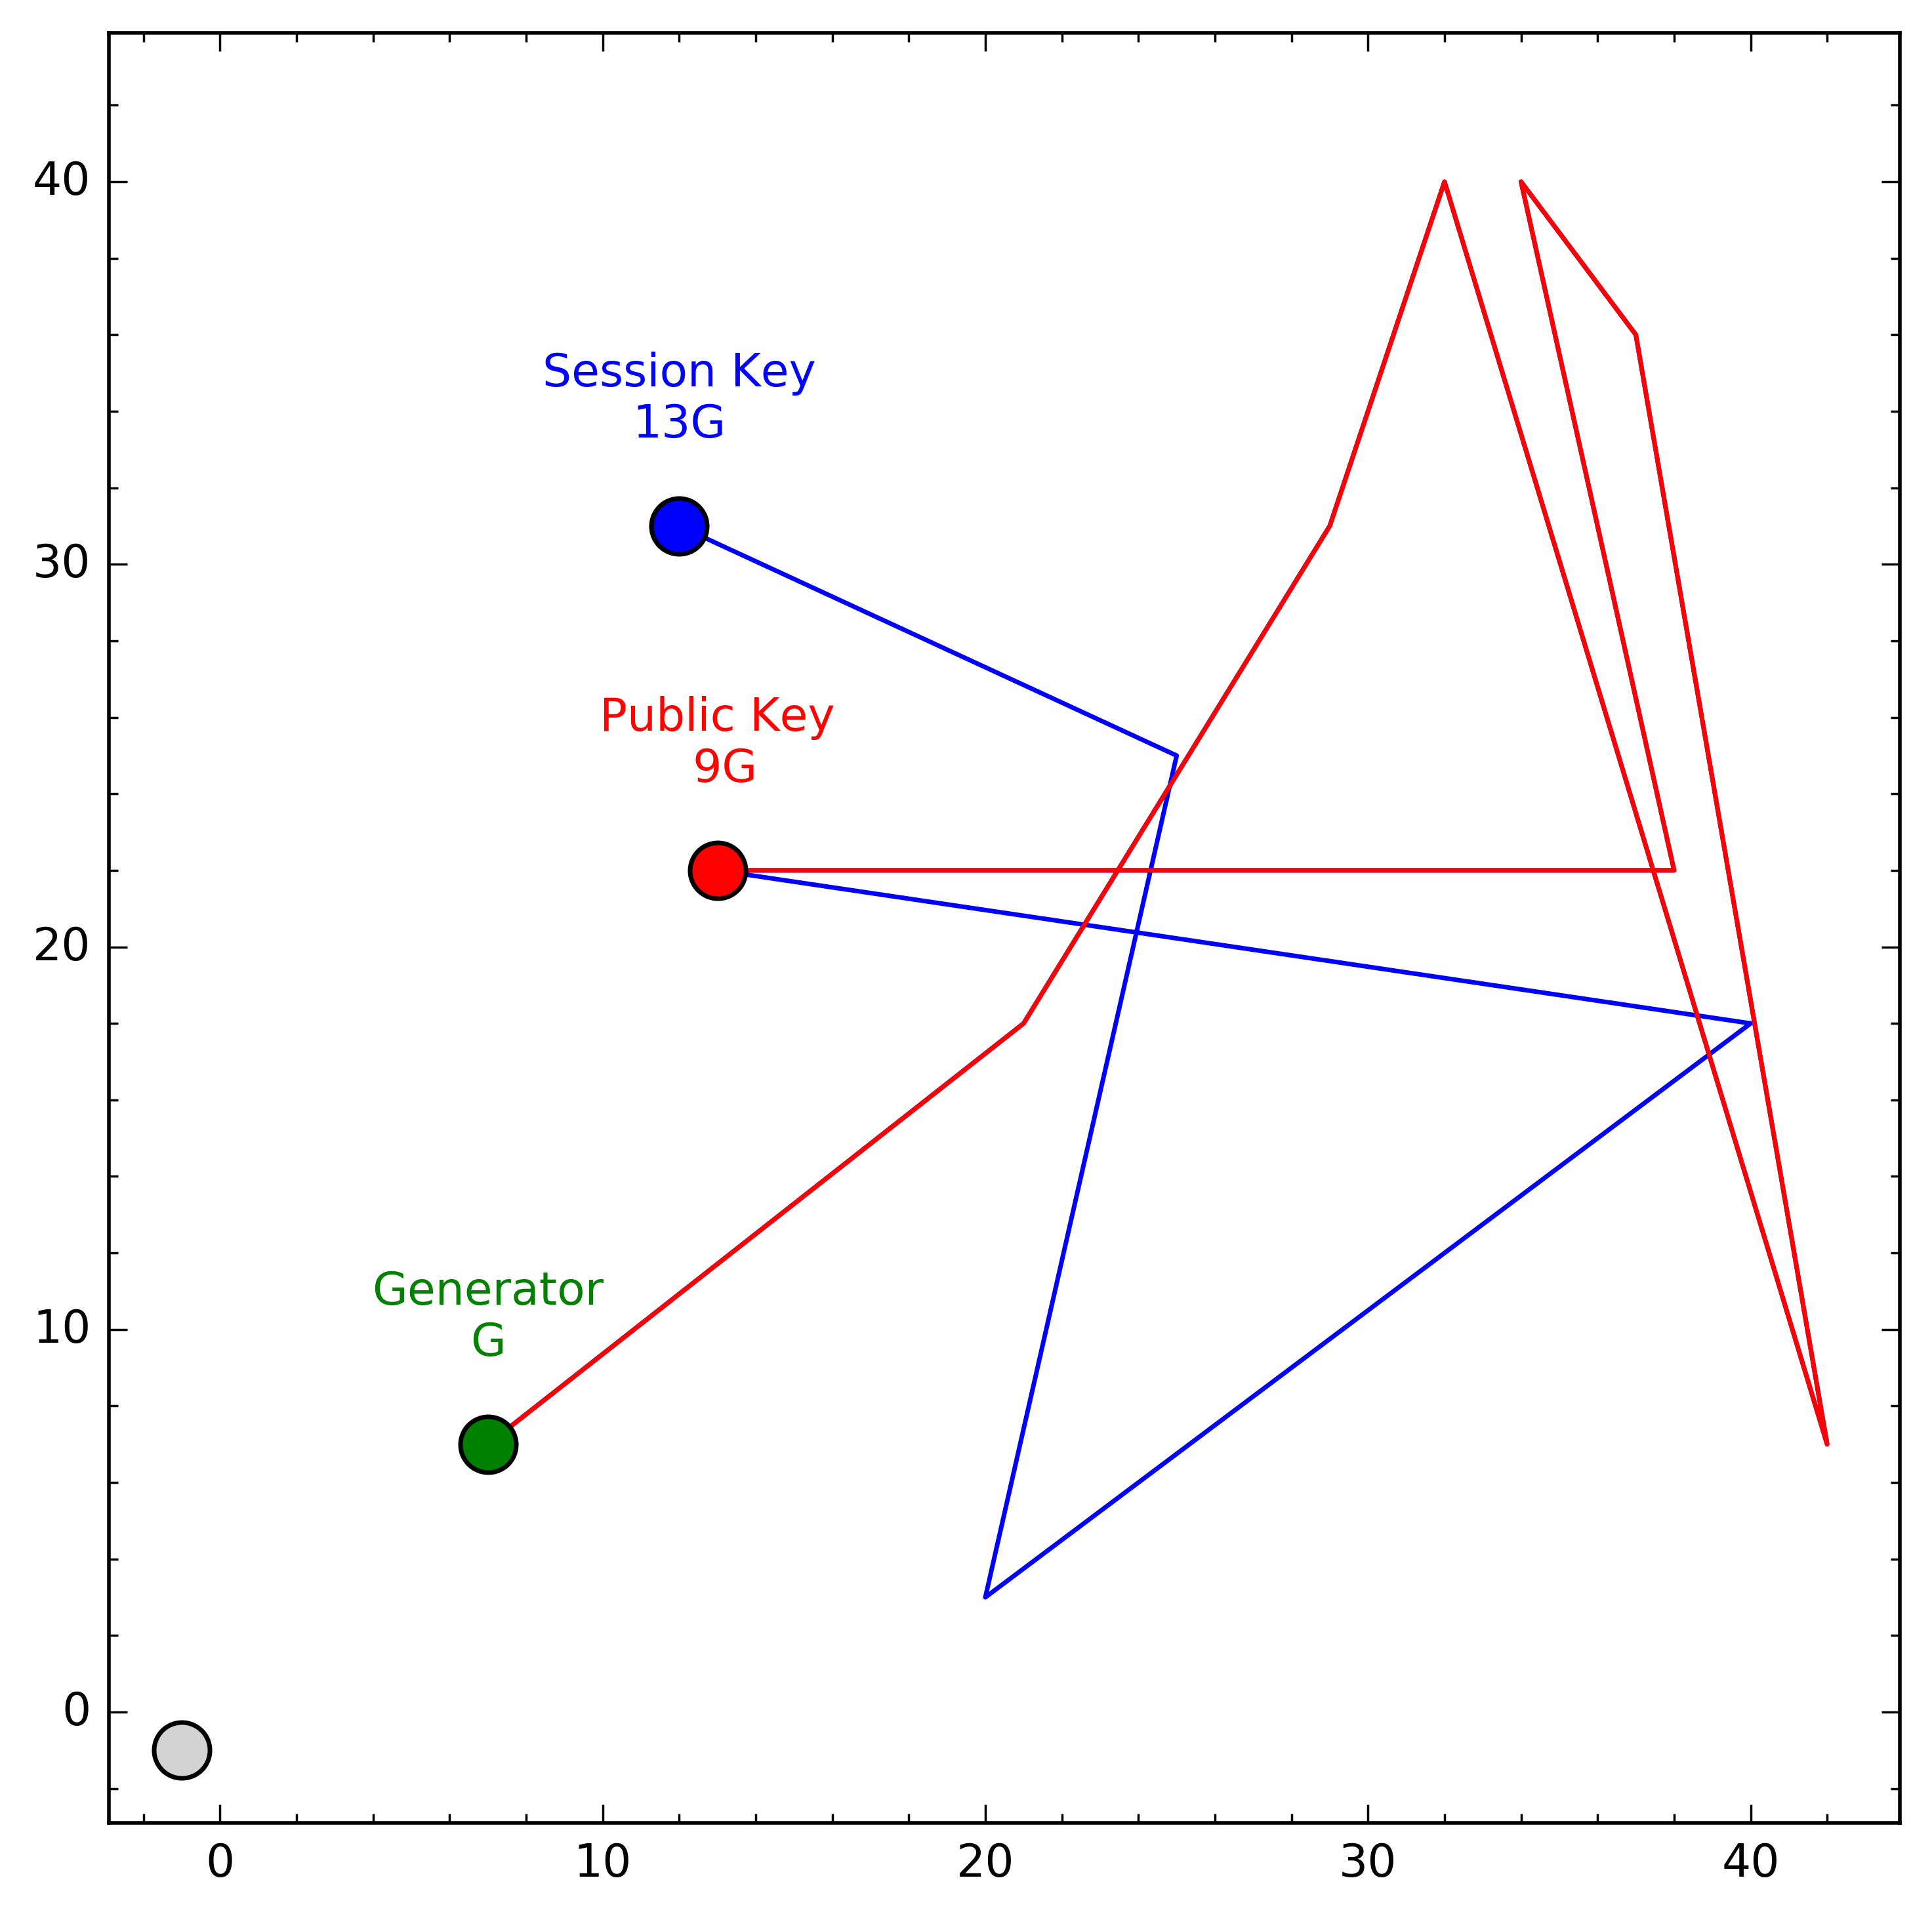

In [49]:
g3 = Graphics()
g3 += scatter_plot([ZERO],        markersize=150, facecolor="lightgrey")
g3 += scatter_plot([(G[0],G[1])], markersize=150, facecolor="green")
g3 += scatter_plot([(P[0],P[1])], markersize=150, facecolor="red")
g3 += scatter_plot([(S[0],S[1])], markersize=150, facecolor="blue")
g3 += line(genpnts[1:sessionkey+1], rgbcolor="blue")
g3 += line(genpnts[1:privatekey+1], rgbcolor="red")
g3 += text("Public Key\n%2sG\n\n\n\n\n"%privatekey, genpnts[privatekey], rgbcolor="red")
g3 += text("Session Key\n%2sG\n\n\n\n\n"%sessionkey, genpnts[sessionkey], rgbcolor="blue")
g3 += text("Generator\nG\n\n\n\n\n", genpnts[1], rgbcolor="green")
show(g3, xmin=-2, xmax=q, ymin=-2, ymax=q, aspect_ratio=1, axes=False, frame=True, dpi=200)

## ECDSA - Signature

Als Signatur wird ein Punkt (r,s) gebildet und weitergeben. Als r (x-Koordite der Signatur) wird die x-Koordinate des Session Keys verwendet. In den Wert s geht öffentlich der Hashwert des zu unterschreibenden Schriftstücks und nicht-öffentlich gehen die beiden geheimen und zufälligen Werte zur Erstellung von Public Key und Session Key ein.

Gleich wird sich zeigen, dass r so etwas wie eine Prüfgröße und s so etwas wie eine Arbeitsgröße darstellt.

In [50]:
hash = 23

r    = Integer(S[0])
kinv = Integer(inverse_mod(sessionkey, n))
s    = (kinv*(hash + r * privatekey))%n

(r, s)

(12, 22)

## ECDSA - Verification

Für die Verfifikation wird aus dem Punkt (r,s) ein Hilfspunkt (u1,u2) gebildet.

In [51]:
sinv  = inverse_mod(s, n)

u1 = (sinv * hash)%n
u2 = (sinv * r   )%n

(u1, u2)

(25, 9)

Die Werte (u1,u2) werden nun so verwendet, dass damit die Summe u1*G + u2*P mit u1-maliger Addition des Generators und u2-maliger Addition des Public Key gebildet wird; beide Punkt - Generator und Public Key sind öffentlich. Und nun kommts: die speziellen Eigenschaften der mathematischen Konstruktion führen dazu, dass als Summe gerade der Session Key herauskommt.

In [52]:
S[0]

12

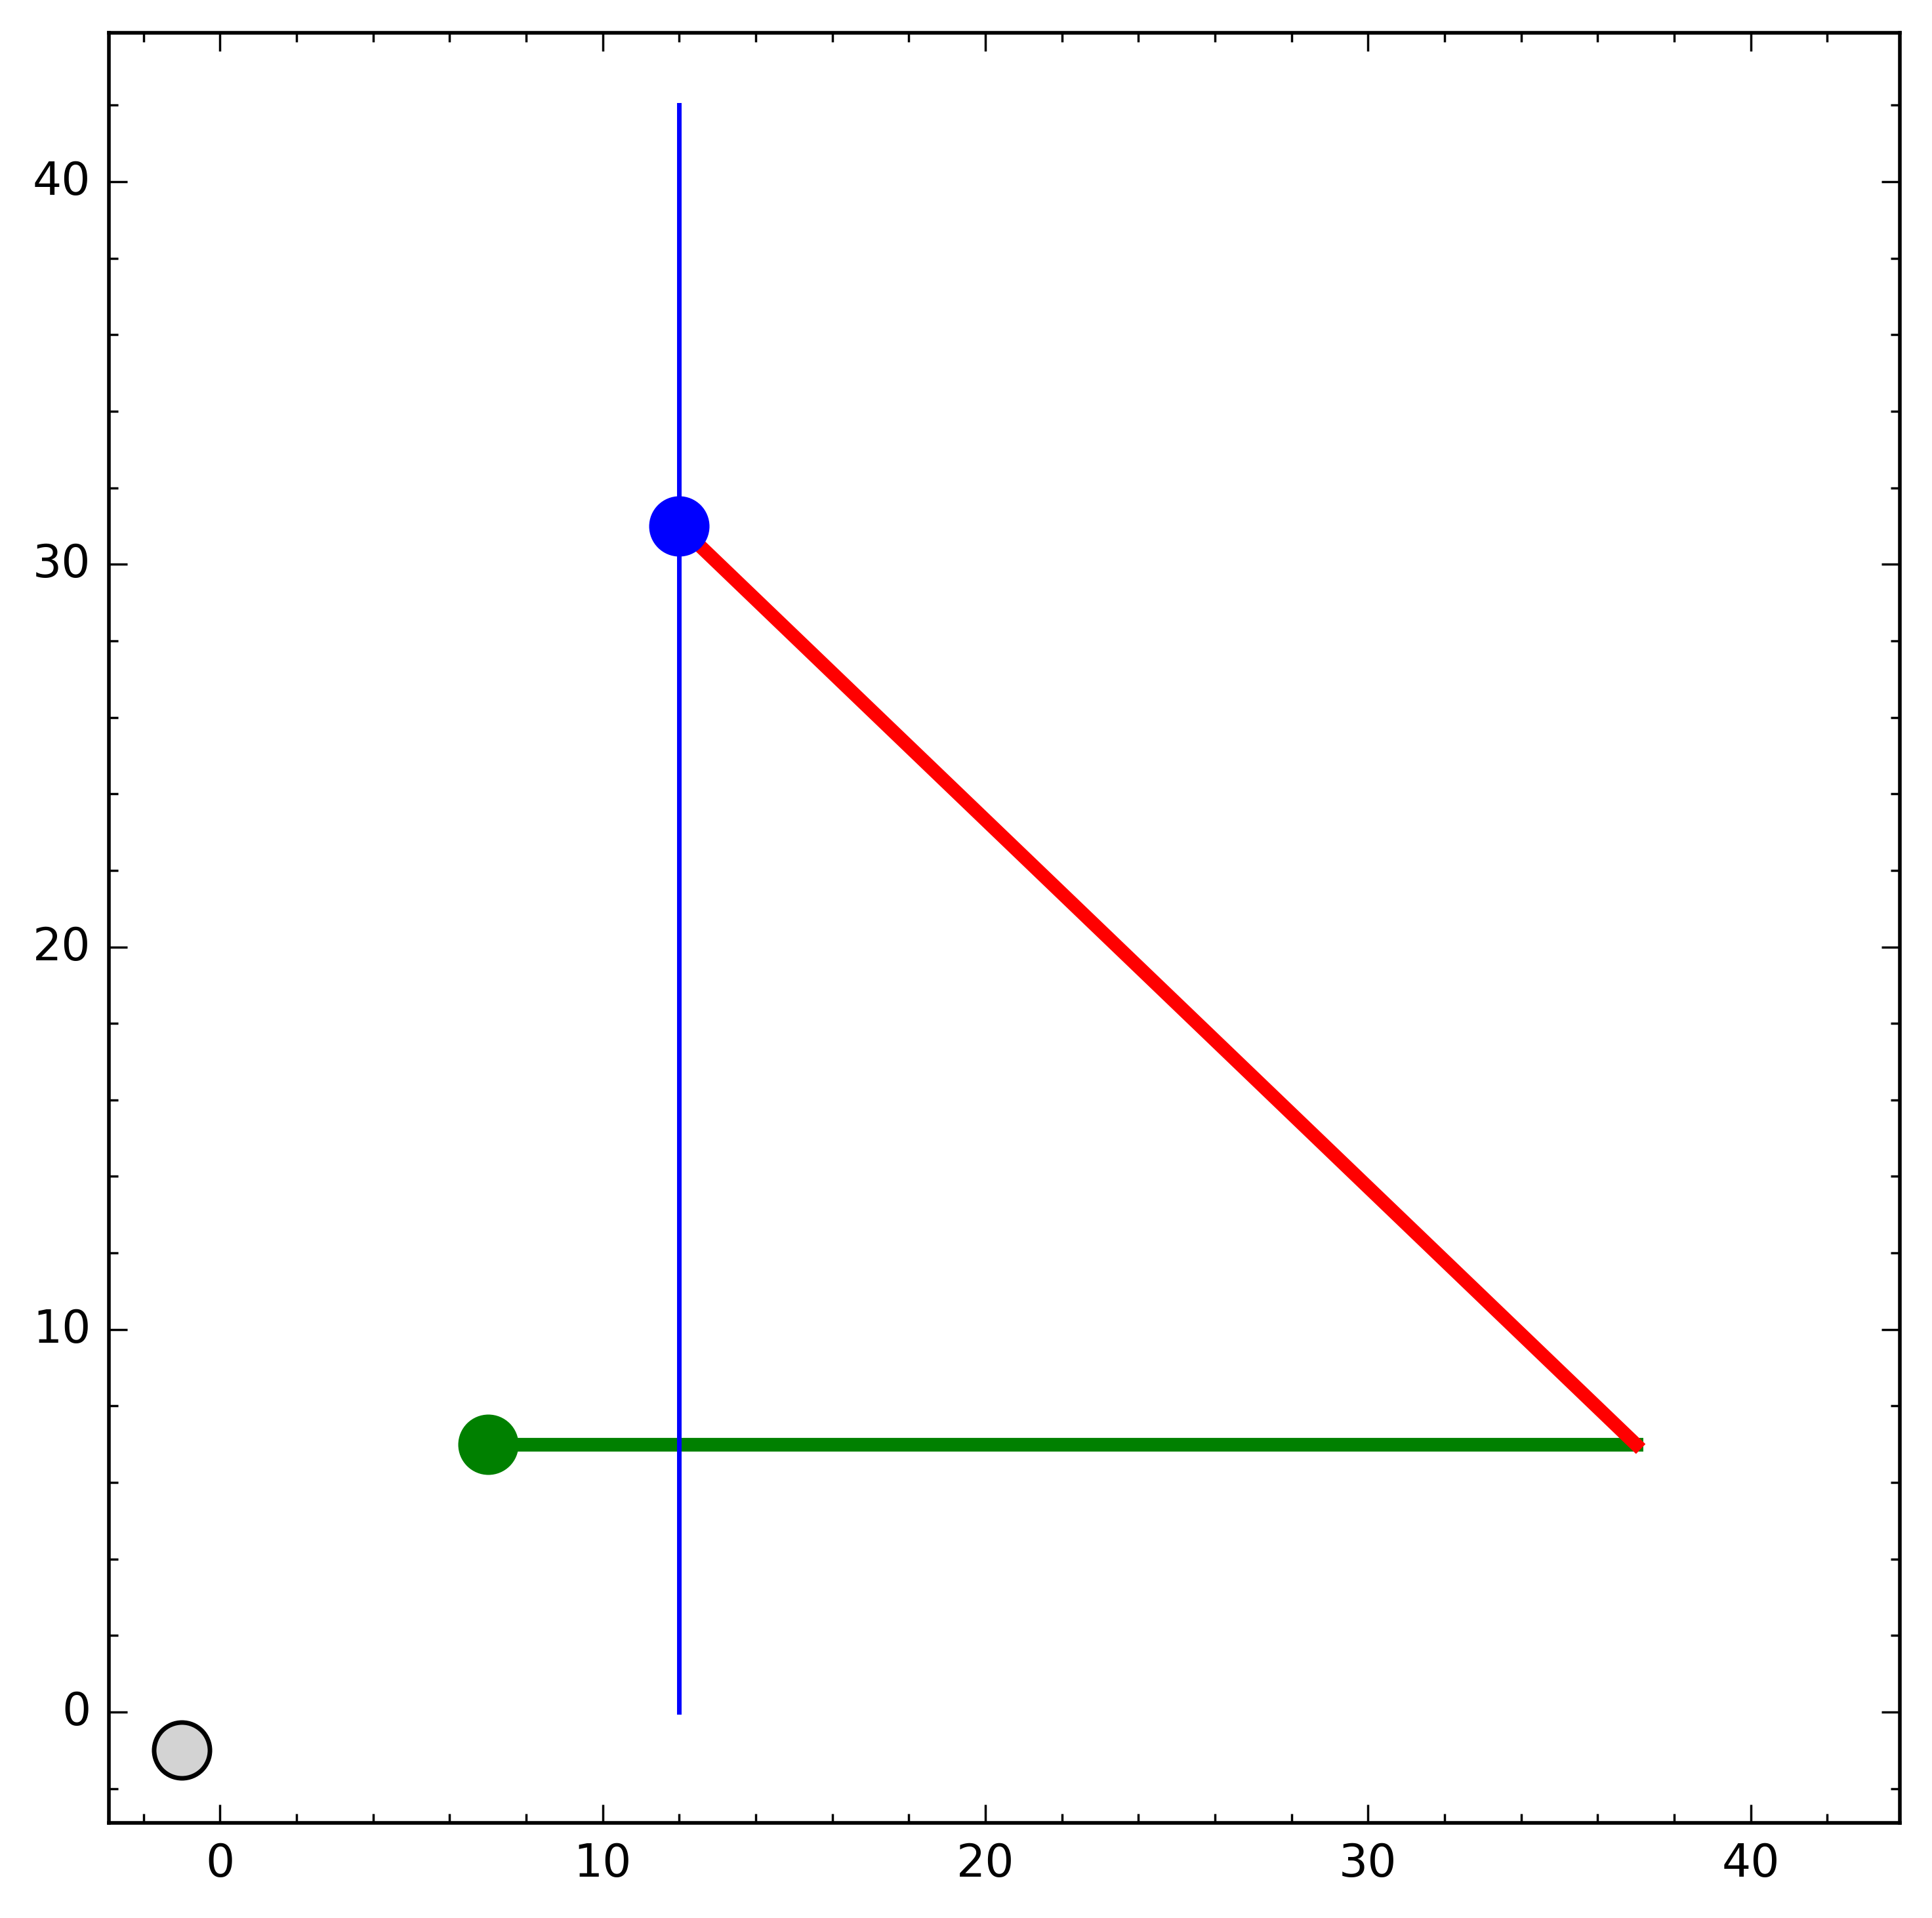

In [53]:
g4 = Graphics()

g4 += scatter_plot([ZERO],        markersize=150, edgecolor="black", facecolor="lightgrey")
g4 += scatter_plot([(G[0],G[1])], markersize=150, edgecolor="green", facecolor="green")
g4 += scatter_plot([(S[0],S[1])], markersize=150, edgecolor="blue",  facecolor="blue")

g4 += line([(G[0],G[1]), ((u1*G)[0],(u1*G)[1])],                                           thickness=3, rgbcolor="green")
g4 += line([((u1*G)[0],(u1*G)[1]), ((u1*G+u2*privatekey*G)[0],(u1*G+u2*privatekey*G)[1])], thickness=3, rgbcolor="red")
g4 += line([(S[0],0),(S[0],q-1)],                                                          thickness=1, rgbcolor="blue")

show(g4, xmin=-2, xmax=q, ymin=-2, ymax=q, aspect_ratio=1, axes=False, frame=True, dpi=200)

## ECDSA

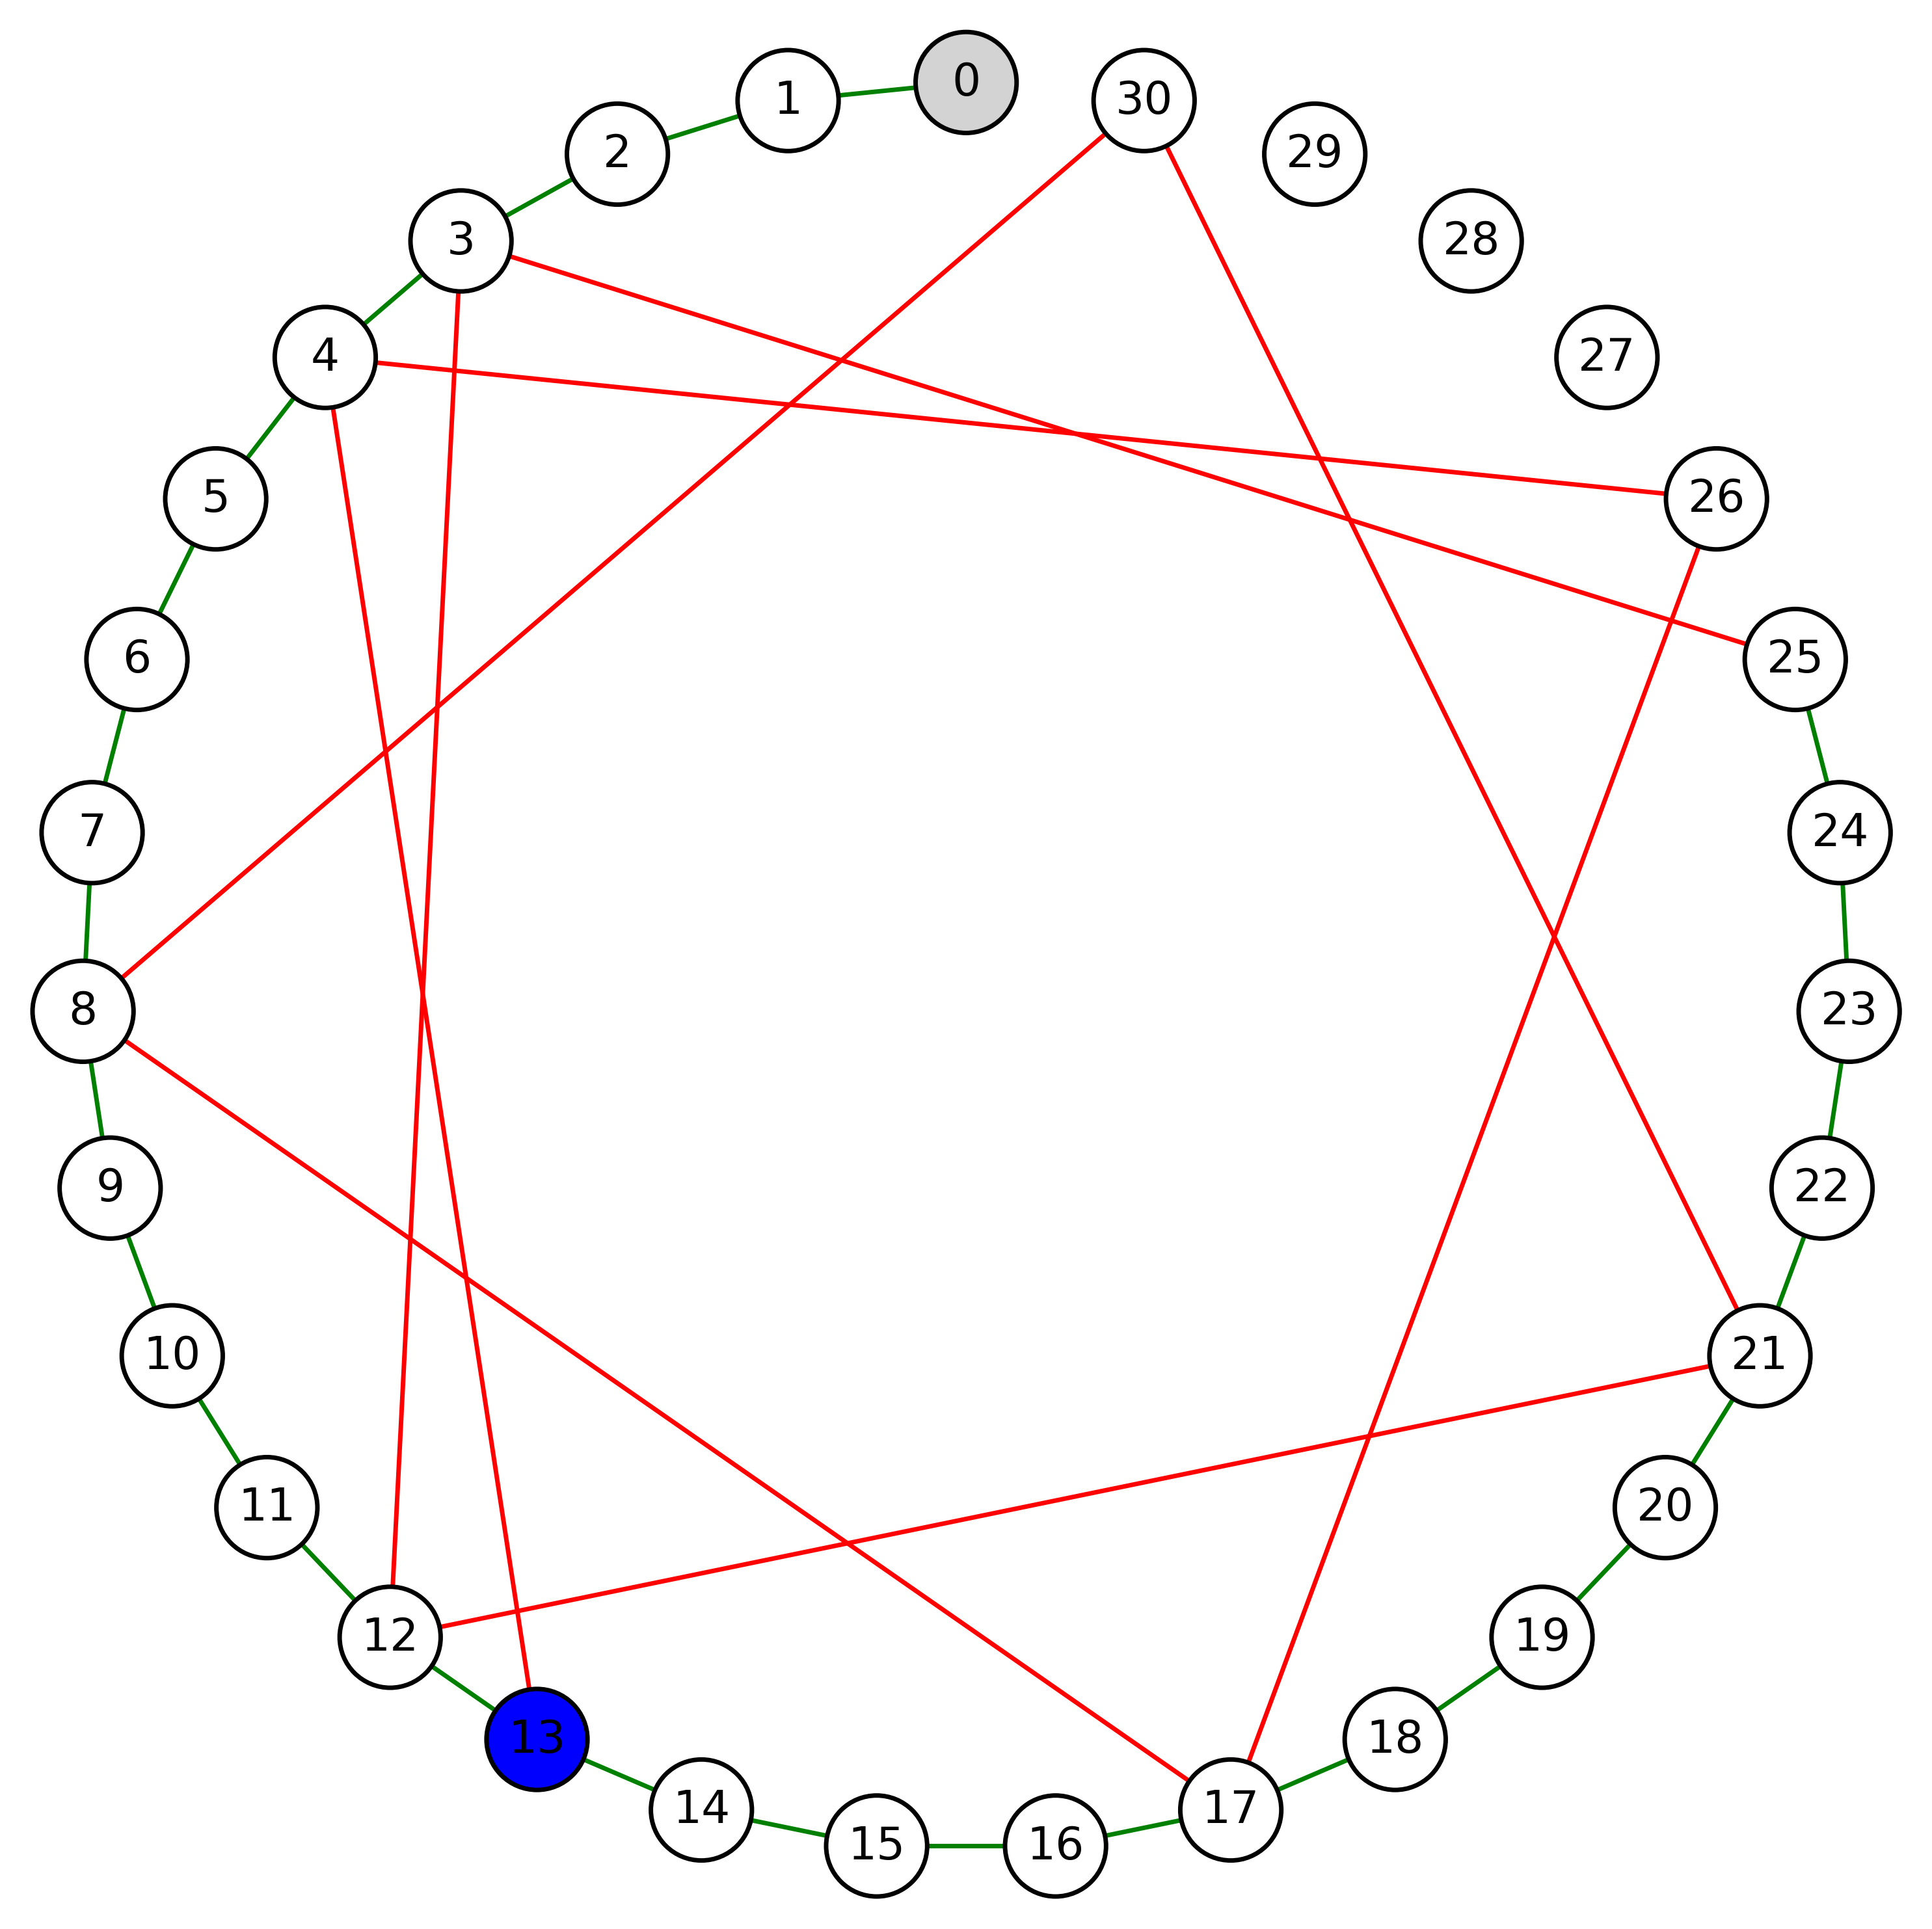

In [54]:
g5              = graphs.CycleGraph(n)
g5.delete_edges([(i%n,(i+1)%n) for i in range(0,n)])
g5.add_edges([(i%n,(i+1)%n) for i in range(0,u1)])
g5.add_edges([((u1+i*u2)%n,(u1+(i+1)*u2)%n) for i in range(0,u2)])
vcols              = {}
vcols['lightgrey'] = [0]
vcols['blue']      = [sessionkey]
vcols['white']     = [i for i in range(1,n) if i != sessionkey]
ecols              = {}
ecols['green']     = [(i%n,(i+1)%n) for i in range(0,u1)]
ecols['red']       = [((u1+i*u2)%n,(u1+(i+1)*u2)%n) for i in range(0,u2)]
show(g5.plot(vertex_colors=vcols, edge_colors=ecols, vertex_size=500), dpi=200)

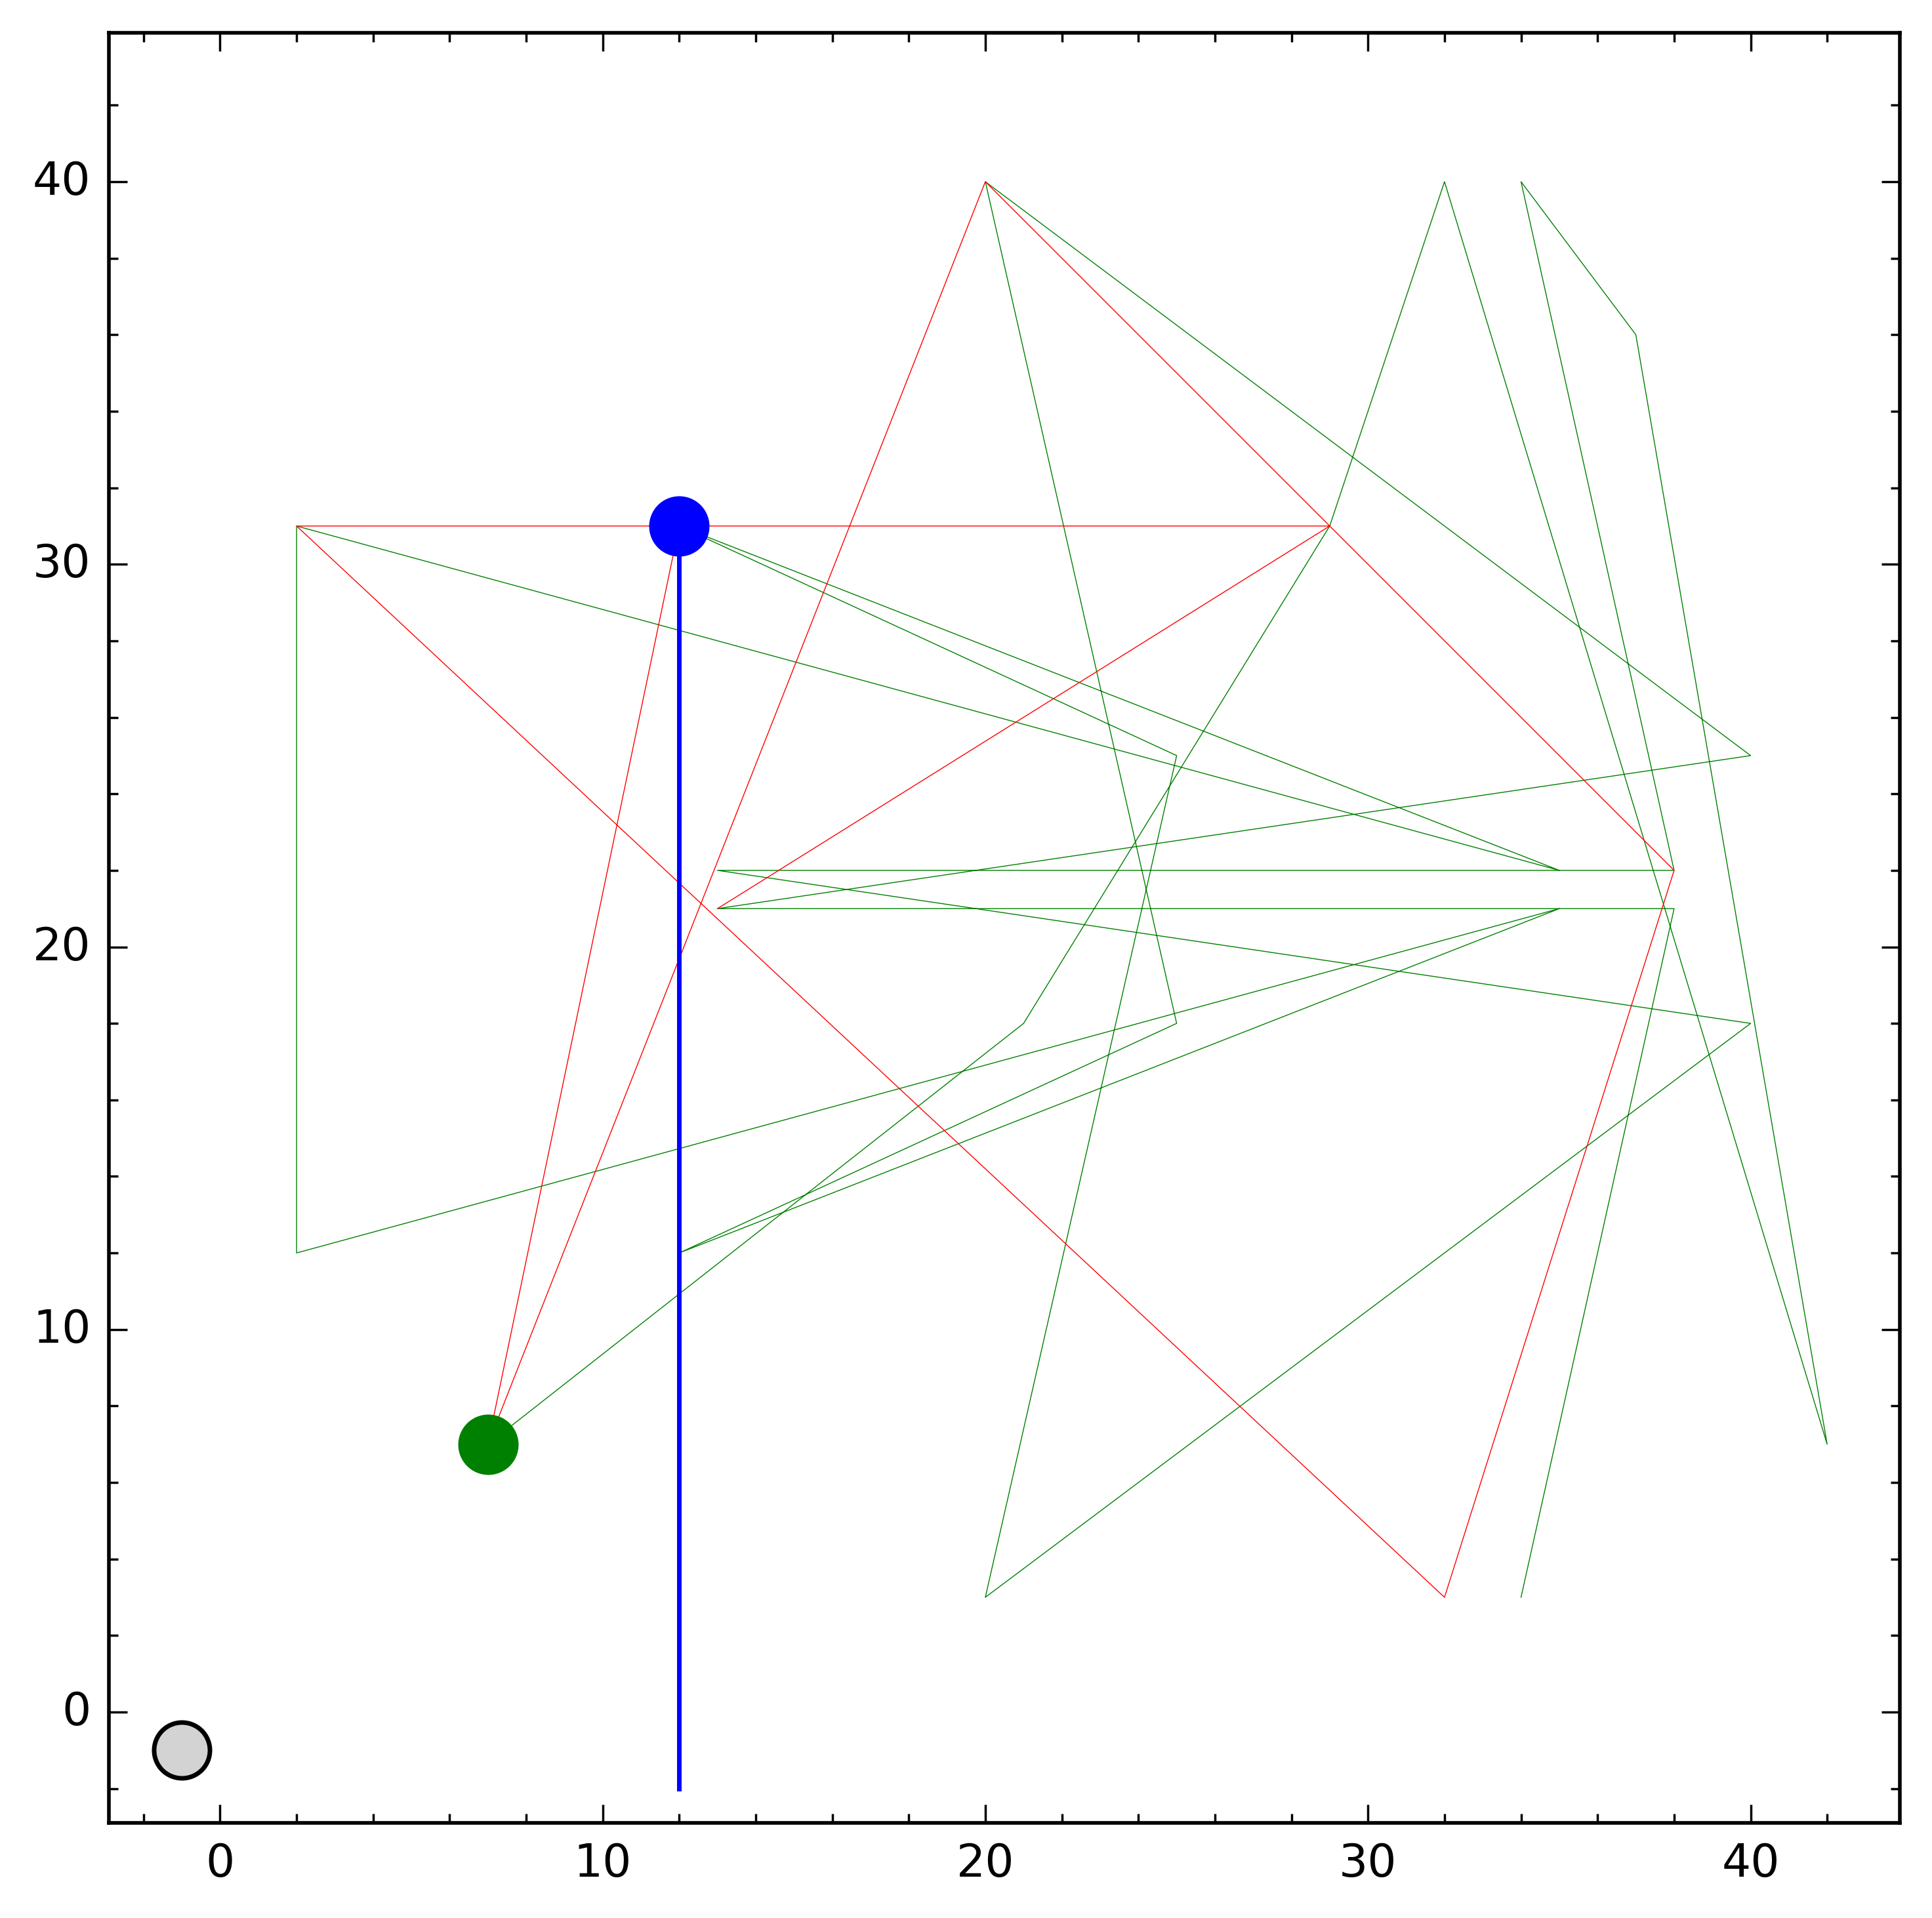

In [55]:
g6 = Graphics()

g6 += scatter_plot([ZERO],        markersize=150, edgecolor="black", facecolor="lightgrey")
g6 += scatter_plot([(G[0],G[1])], markersize=150, edgecolor="green", facecolor="green")
g6 += scatter_plot([(S[0],S[1])], markersize=150, edgecolor="blue",  facecolor="blue")

g6 += line([((i*G)[0],(i*G)[1]) for i in range(1,u1)],                                       thickness=0.2, rgbcolor="green")
g6 += line([(((u1+i*u2*privatekey)*G)[0],((u1+i*u2*privatekey)*G)[1]) for i in range(1,u2)], thickness=0.2, rgbcolor="red")
g6 += line([(((u1+u2*privatekey)*G)[0],((u1+u2*privatekey)*G)[1]),(((u1+u2*privatekey)*G)[0],-2)])

show(g6, xmin=-2, xmax=q, ymin=-2, ymax=q, aspect_ratio=1, axes=False, frame=True, dpi=200)